# Исследование рынка заведений общественного питания Москвы

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

## Загрузка данных и подготовка к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math
import numpy as np
import datetime as dt
import plotly.express as px

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
df.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


In [5]:
# сэкономим память откорректировав тип данных
df['number'] = df['number'].astype('int16')

In [6]:
# изменим название столбца  
df = df.rename(columns={'number':'number_of_seats'})

In [7]:
# приведем все записи к нижнему регистру для избежания дубликатов
df['object_name'] = df['object_name'].str.lower()
df['address'] = df['address'].str.lower()

In [8]:
# проверка на пропуски
df.isna().sum()

id                 0
object_name        0
chain              0
object_type        0
address            0
number_of_seats    0
dtype: int64

In [9]:
# проверка на явные дубликаты (полное повторение в четырех столбцах)
df.duplicated(subset=['object_name', 'address', 'chain', 'object_type']).sum()

183

In [10]:
# удаляем явные дубликаты
df = df.drop_duplicates(subset=['object_name', 'address', 'chain', 'object_type'], ignore_index=True)
df.head(10)

,id,object_name,chain,object_type,address,number_of_seats
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
5,27429,стол. при гоу сош № 1051,нет,столовая,"город москва, абрамцевская улица, дом 15, корп...",240
6,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
7,20957,буфет мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",90
8,20958,кпф семья-1,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",150
9,28858,столовая мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",120


**Вывод**

В процессе предобработки привел к нижнему регистру текстовые данные в столбцах, переименовал столбец с количеством посадочных мест, проверил на дубли и отсутствующие значения.

## Анализ данных

### Cоотношение видов объектов общественного питания по количеству

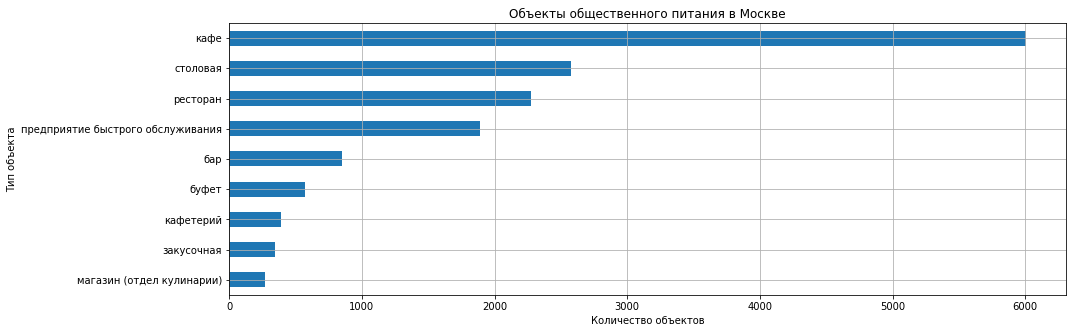

In [11]:
# построим график с количеством объектов для каждого вида заведений
df['object_type'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(15,5), grid=True)
plt.title('Объекты общественного питания в Москве')
plt.xlabel('Количество объектов')
plt.ylabel('Тип объекта')
plt.show()

**Вывод**

Самый распространненый вид заведений общественного питания - кафе, затем идут столовая и ресторан.

### Соотношение сетевых и несетевых заведений по количеству

In [12]:
df['chain'] = df['chain'].map({'нет':'несетевой','да':'сетевой'})

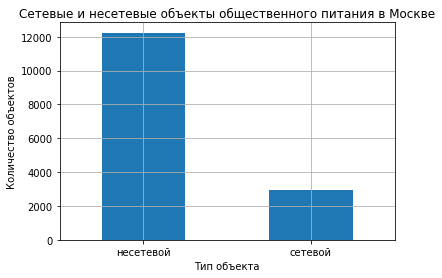

In [13]:
ax = df.groupby('chain')['object_name'].count().sort_values(ascending=False).plot(kind='bar', grid=True)
ax.set_title('Сетевые и несетевые объекты общественного питания в Москве')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество объектов')
plt.xticks(rotation=0)
plt.show()

**Вывод**

Несетевых объектов общественного питания в несколько раз больше, чем сетевых.

### Cетевое распространение некоторых видов объектов общественного питания 

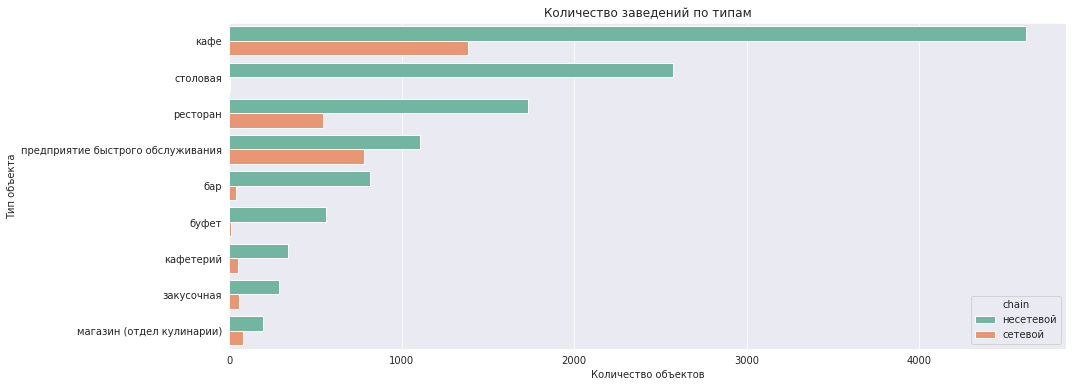

In [14]:
type_grouped = (df.groupby(['object_type', 'chain'])
                  .agg({'id':'count'}).reset_index().sort_values(by='id', ascending=False)
               )
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.barplot(x='id',
            y='object_type',
            hue='chain',
            data=type_grouped,
            palette="Set2")
plt.title('Количество заведений по типам')
plt.xlabel('Количество объектов')
plt.ylabel('Тип объекта')
plt.show()

**Вывод**

Как видим, наиболее характерным сетевое распространение является для предприятий быстрого обслуживания.

### Характерные черты сетевых заведений

In [15]:
# выделим сетевые заведения в отдельный датафрейм
df_chain = df[df['chain'] == 'сетевой'].reset_index()
df_chain.head()

,index,id,object_name,chain,object_type,address,number_of_seats
0,3,21894,пиццетория,сетевой,кафе,"город москва, абрамцевская улица, дом 1",40
1,6,148815,брусника,сетевой,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
2,13,22579,алло пицца,сетевой,кафе,"город москва, улица авиаторов, дом 14",32
3,16,144107,суши wok,сетевой,предприятие быстрого обслуживания,"город москва, азовская улица, дом 3",7
4,18,58565,тануки,сетевой,ресторан,"город москва, большая академическая улица, дом 65",160


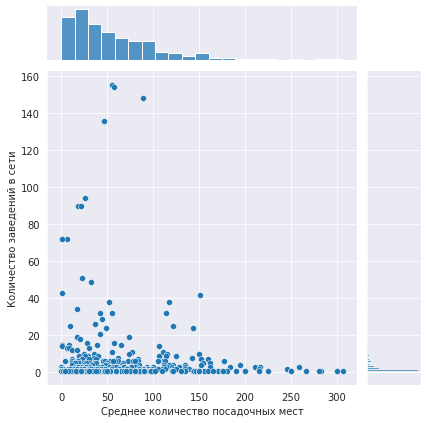

In [16]:
# группируем данные по заведениям и найдем среднее количество посадочных мест и количество заведений
chain_grouped = (df_chain.groupby('object_name')
                 .agg({'id': 'count', 'number_of_seats' : 'mean'})
                 .sort_values(by = 'id', ascending = False)
                )
sns.set_style("darkgrid")
ax = sns.jointplot(x="number_of_seats", y="id", data=chain_grouped)
ax.ax_joint.set_xlabel('Среднее количество посадочных мест')
ax.ax_joint.set_ylabel('Количество заведений в сети')
plt.show()

**Вывод**

Для сетевых заведений характерно большое количество точек с небольшим количеством посадочных мест. 

###  Среднее количество посадочных мест для каждого вида объекта общественного питания

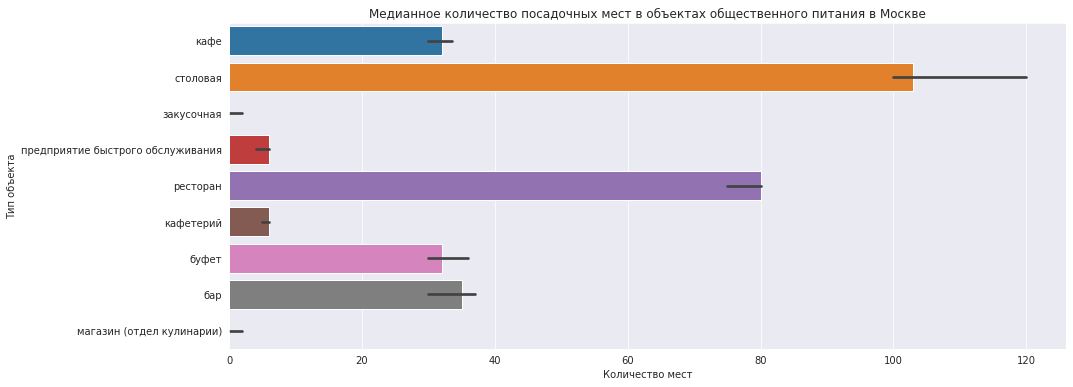

In [18]:
# построим столбчатую диаграмму с медианными значениями
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.barplot(x="number_of_seats", y="object_type", data=df, estimator=np.median)
plt.title('Медианное количество посадочных мест в объектах общественного питания в Москве')
plt.xlabel('Количество мест')
plt.ylabel('Тип объекта')
plt.show()

**Вывод**

Как видим, в среднем больше всего мест предоставляет столовая. Затем идет ресторан, буфет, бар и кафе.

### Топ-10 улиц по количеству объектов общественного питания

In [19]:
# выделим информацию об улице из столбца address и создадим отдельный столбец, куда передадим их названия
text = df['address'].str.split(",", expand=True)
df['streets_name']=text[1]

df.head()

,id,object_name,chain,object_type,address,number_of_seats,streets_name
0,151635,сметана,несетевой,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,несетевой,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,несетевой,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,сетевой,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,несетевой,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


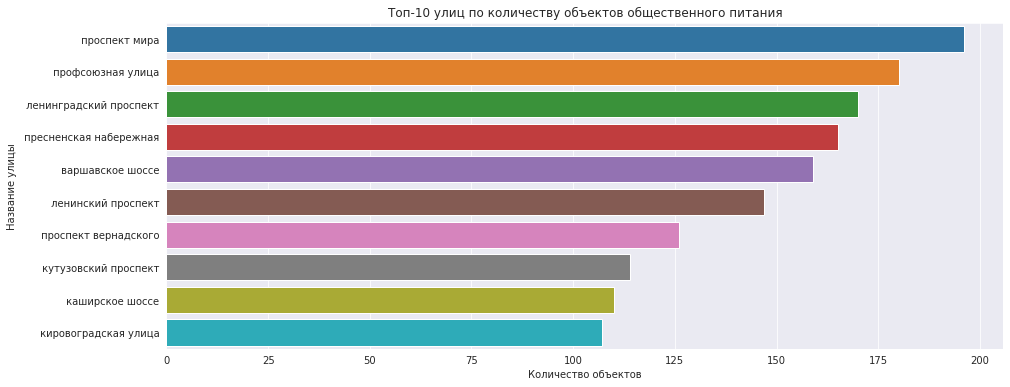

In [20]:
# посчитаем количество объектов на каждой улице
df = df.query('streets_name != " город зеленоград"')
df = df.query('streets_name != " поселение сосенское"')
top10 = df.groupby('streets_name').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.barplot(x="object_type", y="streets_name", data=top10)
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.xlabel('Количество объектов')
plt.ylabel('Название улицы')
plt.show()

In [21]:
# посмотрим в каких районах находятся эти улицы
# для этого загрузим внешнюю информацию о районах и улицах Москвы
streets = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv')

In [22]:
# приведем к нижнему регистру и переименуем столбец для дальнейшего жойна таблиц
streets['streetname'] = streets['streetname'].str.lower()
streets = streets.rename(columns={'streetname':'streets_name'})
streets.head()

,streets_name,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район


In [23]:
# уберем лишние пробелы в столбце с названиями улиц и соединим таблицы
top10['streets_name'] = top10['streets_name'].str.strip()
top10 = top10.merge(streets[['streets_name', 'okrug','area']], on='streets_name', how='left')
top10[['id','streets_name', 'okrug','area']].head(20)

,id,streets_name,okrug,area
0,196,проспект мира,СВАО,Алексеевский район
1,196,проспект мира,СВАО,Ярославский Район
2,196,проспект мира,СВАО,Район Марьина роща
3,196,проспект мира,СВАО,Останкинский район
4,196,проспект мира,СВАО,Район Ростокино
5,196,проспект мира,СВАО,Район Свиблово
6,196,проспект мира,ЦАО,Мещанский район
7,180,профсоюзная улица,ЮЗАО,Академический район
8,180,профсоюзная улица,ЮЗАО,Район Черемушки
9,180,профсоюзная улица,ЮЗАО,Район Ясенево


**Вывод**

Некоторые улицы находятся не только в разных районах, но и округах. Выделяется Пресненская набережная, где наблюдается высокая концентрация заведений.

### Количество улиц с одним объектом общественного питания

In [24]:
# сгруппируем данные в датафрейм с 1-м объектом общественного питания
one = df.groupby('streets_name').agg({'object_name': 'count'}).sort_values(by = 'object_name', ascending = False)
one = one.query('object_name == 1')
one = one.drop('object_name',1)
one = one.reset_index()
one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   streets_name  579 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


Один объект общественного питания находится примерно на 600 улицах.

In [25]:
# уберем лишние пробелы в столбце с названиями улиц и соединим таблицы
one['streets_name'] = one['streets_name'].str.strip()
one = one.merge(streets[['streets_name', 'okrug','area']], on='streets_name', how='left')
one.head(5)

,streets_name,okrug,area
0,1-й ботанический проезд,СВАО,Район Свиблово
1,чуксин тупик,САО,Тимирязевский Район
2,улица красных зорь,ЗАО,Можайский Район
3,бабаевская улица,ВАО,Район Сокольники
4,8-й проезд марьиной рощи,СВАО,Район Марьина роща


In [26]:
# посчитаем районы, в которых находятся улицы с одним объектом общественного питания
len(one['area'].unique())

100

**Вывод**

Исходя из полученных данных, в 100 районах имеется 579 улиц, на которых находится один объект общественного питания.

### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

In [27]:
df['streets_name'] = df['streets_name'].str.strip()
top_10 = list(top10['streets_name'])
temp = df[df['streets_name'].isin(top_10)].reset_index()
temp.head()

,index,id,object_name,chain,object_type,address,number_of_seats,streets_name
0,150,155973,кафе «андерсон»,сетевой,кафе,"город москва, варшавское шоссе, дом 2",150,варшавское шоссе
1,151,23618,кафе «subway»,сетевой,кафе,"город москва, варшавское шоссе, дом 7, корпус 1",36,варшавское шоссе
2,152,155852,кафе «ламаджо»,несетевой,кафе,"город москва, варшавское шоссе, дом 29",30,варшавское шоссе
3,153,152556,шаурма в пите,несетевой,предприятие быстрого обслуживания,"город москва, варшавское шоссе, дом 72, корпус 2",0,варшавское шоссе
4,154,120658,выпечка,несетевой,кафетерий,"город москва, варшавское шоссе, дом 100",2,варшавское шоссе


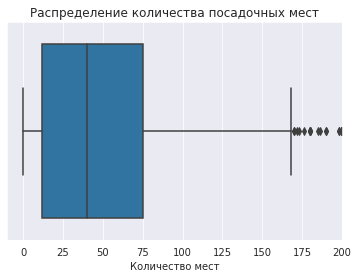

In [28]:
ax = sns.boxplot(x=temp['number_of_seats'])
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество мест')
ax.set_xlim(-10,200)
plt.show()

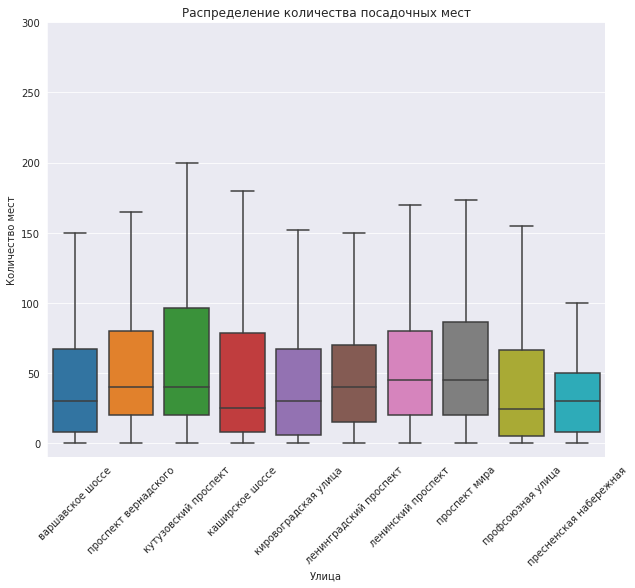

In [29]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="streets_name", y="number_of_seats", data=temp, orient='v', showfliers=False)
plt.xticks(rotation=45)
plt.title('Распределение количества посадочных мест')
plt.xlabel('Улица')
plt.ylabel('Количество мест')
ax.set_ylim(-10,300)
plt.show()

**Вывод**

На наиболее популярных улицах в среднем количество посадочных мест составляет 50 единиц.

## Общие выводы

По результатам исследования нам стало известно, что:


- самый популярный вид заведения общественного питания - кафе
- в Москве преобладают несетевые заведения
- по сетевым программа чаще открывают предприятия быстрого обслуживания и рестораны
- в среднем больше всего посадочных мест в ресторанах и столовых
- наибольшее количество объектов питания расположено на самых протяженных улицах Москвы
- наименьшее количество объектов питания расположено на окраинах города

Рекомендации:

Небольшое кафе с количеством посадочных мест в диапазоне 30-50 штук следует самостоятельно открыть в центральной части города, с одной стороны с высокой проходимостью, с другой стороны, чтобы по соседству было не много заведений подобного рода. То есть обратить внимание на улицы в центре, на которых расположено не много заведений общественного питания. 